In [1]:
from platform import python_version
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm import tqdm

print(python_version())
print(mpl.__version__)
print(torch.__version__)

3.8.5
3.5.1
1.10.2


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
# dataset

mnist_train = datasets.MNIST(root='./mnist/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)
mnist_test = datasets.MNIST(root='./mnist/',
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./mnist/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
# dataloader

BATCH_SIZE = 256

train_iter = torch.utils.data.DataLoader(mnist_train,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=1)

In [5]:
for index, i in enumerate(train_iter):

    if index==1:
        break
    
    print(i[0].shape)
    print(i[1].shape)

torch.Size([256, 1, 28, 28])
torch.Size([256])


In [6]:
# model

class MLPClass(nn.Module):
    
    def __init__(self, name='mlp', xdim=784, hdim=256, ydim=10):
        super(MLPClass, self).__init__()
        self.name = name
        
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        
        self.lin_1 = nn.Linear(self.xdim, self.hdim)
        self.lin_2 = nn.Linear(self.hdim, self.ydim)
        
        self.init_param()
        
    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)
        
    def forward(self, x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        return net

M = MLPClass(name='mlp', xdim=784, hdim=256, ydim=10).to(device)

loss = nn.CrossEntropyLoss()

optm = optim.Adam(M.parameters(), lr=1e-3)

In [7]:
# check parameters

n_param = 0

for param_name, param in M.named_parameters():

    n_param += len(param.reshape(-1))
    
    print(param_name, param.shape)
    print(param)
    print()

print(f'Total number of parameters: {n_param}')

lin_1.weight torch.Size([256, 784])
Parameter containing:
tensor([[-0.0114, -0.0183,  0.0138,  ..., -0.0035, -0.0225, -0.0109],
        [-0.0993,  0.0022,  0.0454,  ...,  0.0823, -0.0650, -0.0665],
        [ 0.0509, -0.0157,  0.0738,  ...,  0.0310, -0.0488, -0.0033],
        ...,
        [ 0.0264, -0.0319,  0.0271,  ...,  0.0177, -0.0210, -0.0037],
        [ 0.0566, -0.0570,  0.0462,  ...,  0.0008,  0.0092,  0.0521],
        [ 0.0525,  0.0219, -0.0188,  ...,  0.0105,  0.0169, -0.0692]],
       requires_grad=True)

lin_1.bias torch.Size([256])
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [8]:
M

MLPClass(
  (lin_1): Linear(in_features=784, out_features=256, bias=True)
  (lin_2): Linear(in_features=256, out_features=10, bias=True)
)

In [111]:
list(M.named_parameters())

[('lin_1.weight',
  Parameter containing:
  tensor([[-0.0683,  0.0539,  0.0112,  ...,  0.0408, -0.0327,  0.0840],
          [ 0.0086,  0.0076, -0.0628,  ..., -0.0544,  0.0880, -0.0398],
          [ 0.0023, -0.0427, -0.0331,  ..., -0.0148, -0.0302, -0.0346],
          ...,
          [ 0.0571, -0.0644, -0.0139,  ...,  0.0854,  0.0402,  0.0072],
          [ 0.0065, -0.0628, -0.0216,  ...,  0.0263, -0.0617,  0.0313],
          [ 0.0211,  0.0613, -0.0511,  ...,  0.0961, -0.0321,  0.0080]],
         requires_grad=True)),
 ('lin_1.bias',
  Parameter containing:
  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0

In [112]:
M.lin_1

Linear(in_features=784, out_features=256, bias=True)

In [113]:
M.lin_1.weight

Parameter containing:
tensor([[-0.0683,  0.0539,  0.0112,  ...,  0.0408, -0.0327,  0.0840],
        [ 0.0086,  0.0076, -0.0628,  ..., -0.0544,  0.0880, -0.0398],
        [ 0.0023, -0.0427, -0.0331,  ..., -0.0148, -0.0302, -0.0346],
        ...,
        [ 0.0571, -0.0644, -0.0139,  ...,  0.0854,  0.0402,  0.0072],
        [ 0.0065, -0.0628, -0.0216,  ...,  0.0263, -0.0617,  0.0313],
        [ 0.0211,  0.0613, -0.0511,  ...,  0.0961, -0.0321,  0.0080]],
       requires_grad=True)

In [120]:
M.lin_1.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [115]:
# simple forward pass of the model

x_numpy = np.random.rand(2,784)
x_torch = torch.from_numpy(x_numpy).float().to(device)

y_torch = M.forward(x_torch)
# Can't use numpy() on Tensor that requires grad. 
# Use tensor.detach().numpy() instead
y_numpy = y_torch.detach().numpy()

print (f'x_numpy: {x_numpy.shape}\n{x_numpy}\n')
print (f'x_torch: {x_torch.shape}\n{x_torch}\n')
print (f'y_torch: {y_torch.shape}\n{y_torch}\n')
print (f'y_numpy: {y_numpy.shape}\n{y_numpy}\n')

x_numpy: (2, 784)
[[0.738 0.912 0.434 ... 0.758 0.123 0.329]
 [0.305 0.641 0.59  ... 0.924 0.437 0.939]]

x_torch: torch.Size([2, 784])
tensor([[0.7377, 0.9119, 0.4338,  ..., 0.7582, 0.1230, 0.3287],
        [0.3055, 0.6410, 0.5902,  ..., 0.9239, 0.4366, 0.9393]])

y_torch: torch.Size([2, 10])
tensor([[-1.9858,  0.2116, -0.4922,  0.3861,  0.6996, -0.1119, -0.1478, -0.1160,
         -1.5001, -0.7900],
        [-1.0128, -0.4024,  0.5113,  1.1909,  0.5354,  0.0082, -0.1829,  0.0639,
         -1.7260, -0.4146]], grad_fn=<AddmmBackward0>)

y_numpy: (2, 10)
[[-1.986  0.212 -0.492  0.386  0.7   -0.112 -0.148 -0.116 -1.5   -0.79 ]
 [-1.013 -0.402  0.511  1.191  0.535  0.008 -0.183  0.064 -1.726 -0.415]]



In [116]:
# evaluation function

def func_eval(model, data_iter, device):
    
    with torch.no_grad():
        model.eval()
        
        # torch.no_grad & model.eval(): evaluation mode
        # turns off dropout and BN
        
        n_correct, n_total = 0, 0
        
        for X, y in data_iter:
            
            y = y.to(device)
            # print(f'y:\n{y}\n')

            output = model(X.view(-1, 28*28).to(device))
            # print(f'output:\n{output}\n')
            _, y_pred = torch.max(output, 1)
            # print(f'y_pred:\n{y_pred}\n')
            
            # torch.max(input, dim) returns (values, indices).
            # torch.max(input) returns value.
            
            n_correct += (y_pred==y).sum().item()
            # Tensor.item() returns the value of this tensor.
            # as a standard python number.
            # Only works for tensors with one element.
            # For other cases, use tolist()
            
            n_total += X.size(0)
            
        acc = n_correct/n_total
        
        model.train() # back to train mode
        
    return acc

In [117]:
M.init_param() # initialize parameters

train_acc = func_eval(M, train_iter, device)
test_acc = func_eval(M, test_iter, device)

print(train_acc)
print(test_acc)

0.10871666666666667
0.1139


In [118]:
# train

M.init_param()
M.train()

EPOCHS = 10
print_every = 1

for epoch in range(EPOCHS):
    
    loss_val_sum = 0
    
    for X, y in tqdm(train_iter):
        
        output = M.forward(X.view(-1, 28*28).to(device))
        
        loss_out = loss(output, y.to(device))
        # print(output)
        # print(y.to(device))
        
        # output은 10개의 element를 갖는 리스트이고
        # y는 0에서 9 사이의 정수인데
        # 어떻게 loss function에 같이 넣는게 가능???
        
        optm.zero_grad() # reset gradient
        
        loss_out.backward() # backprop
        
        optm.step() # optimizer update
        
        loss_val_sum += loss_out
        
    loss_val_avg = loss_val_sum/len(train_iter)
    
    if ((epoch%print_every)==0) or (epoch==(EPOCH-1)):
        
        train_acc = func_eval(M, train_iter, device)
        test_acc = func_eval(M, test_iter, device)
        
        print(f'epoch: {epoch}, loss: {loss_val_avg}')
        print(f'train_acc: {train_acc}, test_acc: {test_acc}')

  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 0, loss: 0.37538042664527893
train_acc: 0.9471833333333334, test_acc: 0.9429


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 1, loss: 0.1632610708475113
train_acc: 0.9659833333333333, test_acc: 0.9598


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 2, loss: 0.11501523107290268
train_acc: 0.9748666666666667, test_acc: 0.9681


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 3, loss: 0.08778809756040573
train_acc: 0.9816, test_acc: 0.9733


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 4, loss: 0.0694730132818222
train_acc: 0.9833333333333333, test_acc: 0.9732


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 5, loss: 0.05736884847283363
train_acc: 0.9861333333333333, test_acc: 0.9743


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 6, loss: 0.0485711395740509
train_acc: 0.9897666666666667, test_acc: 0.9772


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 7, loss: 0.039260681718587875
train_acc: 0.99305, test_acc: 0.9779


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 8, loss: 0.03289056941866875
train_acc: 0.9936666666666667, test_acc: 0.9784


  0%|          | 0/235 [00:00<?, ?it/s]

epoch: 9, loss: 0.028445513918995857
train_acc: 0.9958166666666667, test_acc: 0.9796


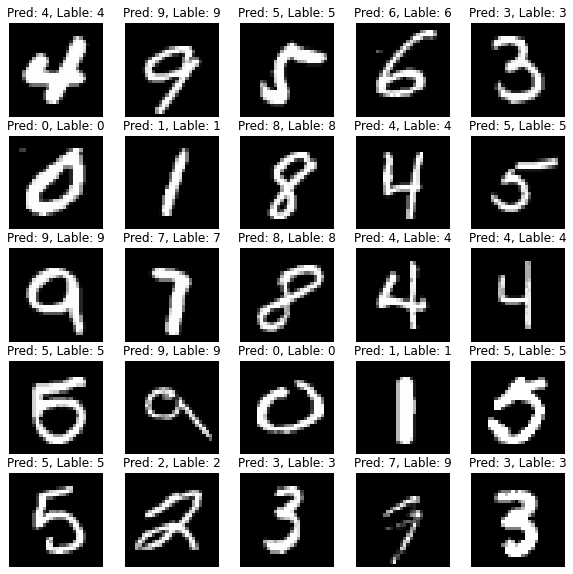

In [119]:
# test

n_samples = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_samples, replace=False)

test_X = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]

with torch.no_grad():
    output = M.forward(test_X.view(-1, 28*28).type(torch.float).to(device)/255.)
    
y_pred = output.argmax(axis=1)

plt.figure(figsize=(10, 10))
for idx in range(n_samples):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_X[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'Pred: {y_pred[idx]}, Lable: {test_y[idx]}')
plt.show()
